In [1]:
""" Installing libraries """
# %pip install pandas==2.3.2 matplotlib==3.10.6 seaborn==0.13.2 scikit-learn==1.7.1 numpy==2.2.6 pyarrow==21.0.0 torch==2.8.0
%pip install --quiet pandas==2.3.2 matplotlib==3.10.6 seaborn==0.13.2 scikit-learn==1.7.1 numpy==2.2.6 pyarrow==21.0.0 torch==2.8.0


Note: you may need to restart the kernel to use updated packages.


In [2]:
""" Importing libraries """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
""" Importing our modules """

from Modules.loading.read_parquet import get_file_paths, load_dataframes
from Modules.loading.plug_n_play import get_clean_data
# from Modules.preprocessing.onehot import one_hot_encode_parquet
from Modules.preprocessing.removing_categorical_tables import get_numerical_table
from Modules.preprocessing.removing_outliers import remove_outliers
from Modules.preprocessing.pivoting import pivoting_df
from Modules.preprocessing.rescaling import rescale_zero_to_one


In [4]:
# full_df = get_clean_data(verbose=True)
# full_df.T

In [5]:
""" Setting up the constants """

FILE_PATHS = get_file_paths()


In [6]:
""" Loading the data """

# for file in FILE_NAMES:
loaded_data = load_dataframes(FILE_PATHS)

In [7]:
""" getting only the needed numerical data """

numerical_table = get_numerical_table(loaded_data)

In [8]:
""" Print numerical_table """

numerical_table

,internal_store_id,internal_product_id,transaction_date,quantity
0,7384367747233276219,328903483604537190,2022-07-13,1
1,3536908514005606262,5418855670645487653,2022-03-21,6
2,3138231730993449825,1087005562675741887,2022-09-06,3
3,3681167389484217654,1401422983880045188,2022-09-11,129
4,7762413312337359369,6614994347738381720,2022-02-18,1
...,...,...,...,...
6560693,1439579822593789678,2523145330235258825,2022-12-06,3
6560694,2357589266242432199,3148628429396585683,2022-05-20,1
6560695,7245187752757348055,6668439675743950745,2022-08-17,1
6560696,8952609383990245450,3894706280449257667,2022-02-03,4


Before Outlier Removal: {'size': 6560698, 'col': 'quantity', 'min': np.int64(-1530), 'max': np.int64(94230)}


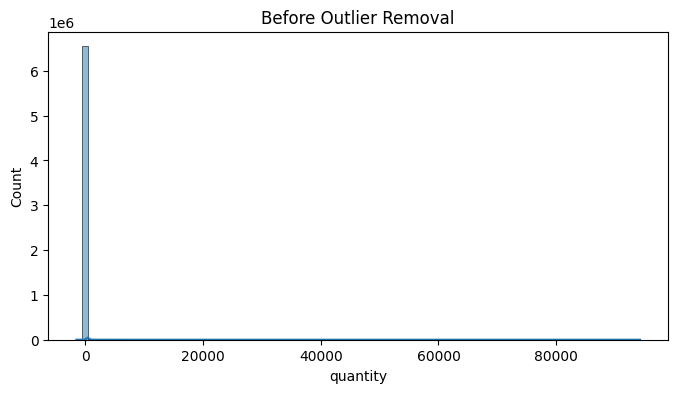

After Outlier Removal: {'size': 6263906, 'col': 'quantity', 'min': np.int64(-12), 'max': np.int64(23)}


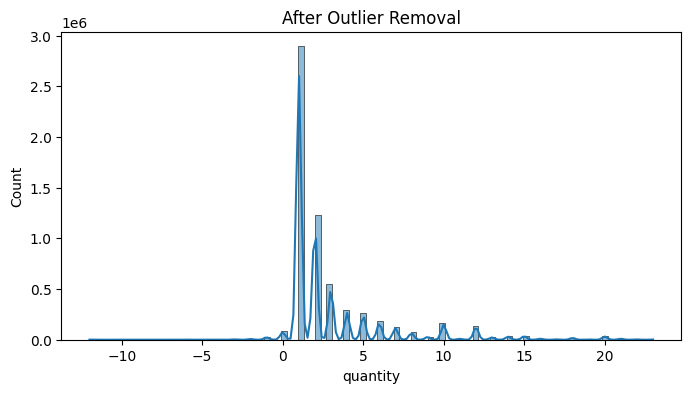

After Forcing Positives: {'size': 6135548, 'col': 'quantity', 'min': np.int64(1), 'max': np.int64(23)}


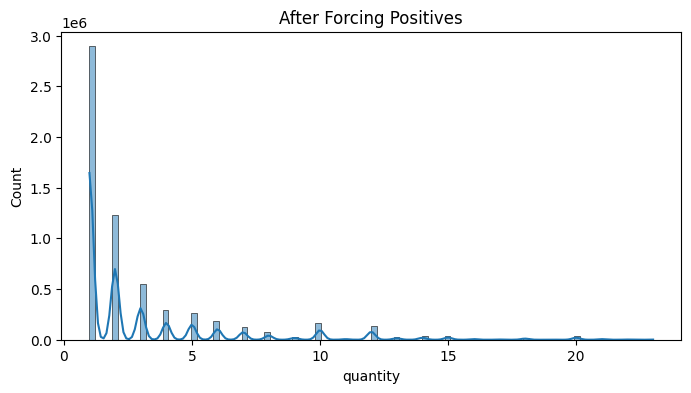

In [9]:
""" Removing outliers from 'quantity' column """

outlierless = remove_outliers(numerical_table.copy(), 'quantity', 0.1, 0.9, True)


In [10]:
""" Cleaned Data - Without Outliers """

outlierless.sort_values(by=['quantity'])

,internal_store_id,internal_product_id,transaction_date,quantity
5307873,2585532595768473758,3182475916267245243,2022-04-27,1
13,5538851823321709722,6189453893821323891,2022-04-26,1
6560676,942119899345107493,1463221107867223738,2022-05-11,1
6560677,2194763301888920810,200407080435025895,2022-08-16,1
49,7200116106667687476,2332258305086273987,2022-09-01,1
...,...,...,...,...
1929576,5692653025864953570,8275181357437864705,2022-07-27,23
5324137,5744415101119137460,4812820769215907968,2022-09-11,23
6068849,4925970322242229800,1009179103632945474,2022-11-10,23
5307673,8934295196560264568,2410058858025918589,2022-09-11,23


In [11]:
""" Count unique products per store """

result = outlierless.groupby('internal_store_id')['internal_product_id'].nunique()
result.sort_values(ascending=False)


internal_store_id
8723723113467008071    728
5269757182493118473    724
3334696954558856285    678
3536908514005606262    670
4374038751643985193    657
                      ... 
5208202371054080155      1
968145864753757894       1
965097470958342132       1
4617138570043911857      1
1920561540814115699      1
Name: internal_product_id, Length: 14865, dtype: int64

In [12]:
""" Count unique stores per product """

result = outlierless.groupby('internal_product_id')['internal_store_id'].nunique()
result.sort_values(ascending=False)

internal_product_id
3262679882836704514    6758
4623814317972718932    6478
8174625658473329985    6431
8625590539951587748    6154
4098058333001424920    5709
                       ... 
2451964318441512345       1
981834495003075119        1
4651530946028857564       1
937863914148613323        1
4715247228246581608       1
Name: internal_store_id, Length: 6667, dtype: int64

In [13]:
""" Pivotando """
  
pivoted_df = pivoting_df(outlierless.copy())

In [14]:
""" Transposing pivoted_df """

pivoted_df.T

transaction_date                         2022-01-01  2022-01-02  2022-01-03  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-04  2022-01-05  2022-01-06  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-07  2022-01-08  2022-01-09  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-10  ...  2022-12-22  \
internal_product_id internal_store_id                ...               
1000423277513436210 1164003957453133052           0  ...           0   
                    1870860275432322673           0  ...           0   
                    2096630570628676364           0  ...           0   
                    217259671743916895            0  ...           0   
                    2787787091062505567           0  ...           0   
...                                             ...  ...         ...   
999285078291803499  8814266804222259306           0  ...           0   
                    9166806434271779264           0  ...           0   
                    916729969482946290            0  ...           0   
                    9191426288226387170           0  ...           0   
                    949847633002469434            0 

In [15]:
""" Re-scaling """

rescaled_df = rescale_zero_to_one(pivoted_df.copy())


In [16]:
rescaled_df.T

transaction_date                         2022-01-01  2022-01-02  2022-01-03  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-04  2022-01-05  2022-01-06  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-07  2022-01-08  2022-01-09  \
internal_product_id internal_store_id                                         
1000423277513436210 1164003957453133052           0           0           0   
                    1870860275432322673           0           0           0   
                    2096630570628676364           0           0           0   
                    217259671743916895            0           0           0   
                    2787787091062505567           0           0           0   
...                                             ...         ...         ...   
999285078291803499  8814266804222259306           0           0           0   
                    9166806434271779264           0           0           0   
                    916729969482946290            0           0           0   
                    9191426288226387170           0           0           0   
                    949847633002469434            0           0           0   

transaction_date                         2022-01-10  ...  2022-12-22  \
internal_product_id internal_store_id                ...               
1000423277513436210 1164003957453133052           0  ...           0   
                    1870860275432322673           0  ...           0   
                    2096630570628676364           0  ...           0   
                    217259671743916895            0  ...           0   
                    2787787091062505567           0  ...           0   
...                                             ...  ...         ...   
999285078291803499  8814266804222259306           0  ...           0   
                    9166806434271779264           0  ...           0   
                    916729969482946290            0  ...           0   
                    9191426288226387170           0  ...           0   
                    949847633002469434            0 